C:\Users\stacy\AppData\Local\Temp\ipykernel_8056\71073500.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img);
C:\Users\stacy\AppData\Local\Temp\ipykernel_8056\71073500.py:25: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(b);
C:\Users\stacy\AppData\Local\Temp\ipykernel_8056\71073500.py:26: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(g);
C:\Users\stacy\AppData\Local\Temp\ipykernel_8056\71073500.py:27: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(r);
C:\Users\stacy\AppData\Local\Temp\ipykernel_8056\71073500.py:74: Fu

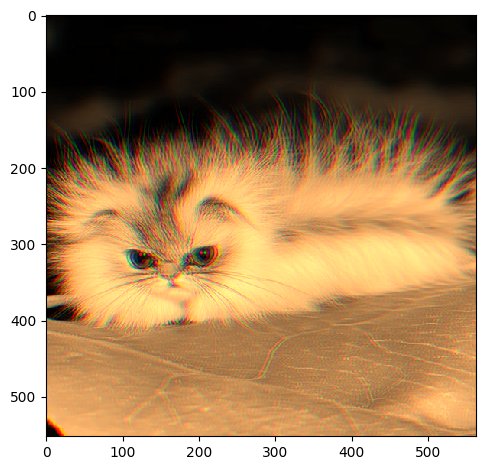

In [ ]:
from skimage.io import imread, imsave, imshow

img = imread('triple_generated.png')
imshow(img);
img.shape

from skimage import img_as_float, img_as_ubyte

img_f = img_as_float(img)
vertical_border = int(img_f.shape[1] * 0.12 // 2) 
vertical_border

one_third_rows = img_f.shape[0] // 3 
one_third_rows
horizontal_border = int((img_f.shape[0] // 3) * 0.07) 
horizontal_border

(b, g, r) = [img_f[one_third_rows * i + horizontal_border : one_third_rows * (i + 1) - horizontal_border, 
                           vertical_border : -(vertical_border)] 
             for i in range(3)]

b.shape
g.shape
r.shape
imshow(b);
imshow(g);
imshow(r);

import numpy as np


max_correlation_params = {
    0 : {
        'image': 'blue channel',
        'max_arr' : np.array([]),
        'max_correlation' : 0,
        'max_row' : -15,
        'max_column' : -15
    },
    1 : {
        'image': 'red channel',
        'max_arr' : np.array([]),
        'max_correlation' : 0,
        'max_row' : -15,
        'max_column' : -15
    }
}

for img_channel in enumerate((b, r)):
    for row_shift in range(-15, 16):
        arr_rolled_row = np.roll(img_channel[1], row_shift, axis=0)
        for column_shift in range(-15, 16):
            arr_rolled = np.roll(arr_rolled_row, column_shift, axis=1)
            correlation = (arr_rolled * g).sum()
            if correlation > max_correlation_params[img_channel[0]]['max_correlation']:
                max_correlation_params[img_channel[0]]['max_row'] = row_shift
                max_correlation_params[img_channel[0]]['max_column'] = column_shift
                max_correlation_params[img_channel[0]]['max_correlation'] = correlation
                max_correlation_params[img_channel[0]]['max_arr'] = arr_rolled


max_correlation_params

row_g, col_g = (508, 237)

(row_b, col_b) = (row_g - (img.shape[0] // 3) - max_correlation_params[0]['max_row'], col_g - max_correlation_params[0]['max_column'])
(row_b, col_b)
(row_r, col_r) = (row_g + (img.shape[0] // 3) - max_correlation_params[1]['max_row'], col_g - max_correlation_params[1]['max_column'])
(row_r, col_r)

from numpy import dstack

img_combined = dstack((max_correlation_params[1]['max_arr'], g, max_correlation_params[0]['max_arr']))
imshow(img_combined);
img_combined_without_shift = dstack((r, g, b))
imshow(img_combined_without_shift);
without_shift = img_as_ubyte(img_combined_without_shift)
imsave('00-without-shift.png', without_shift)
shift = img_as_ubyte(img_combined)
imsave('00-color.png', shift)

In [ ]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
import numpy as np


img = imread('image.jpg')  
if img.ndim == 3:
    gray = rgb2gray(img)
else:
    gray = img / 255.0


b = np.clip(np.roll(gray * 0.6, 5, axis=1), 0, 1)  
g = np.clip(np.roll(gray * 1.0, 0, axis=1), 0, 1)  
r = np.clip(np.roll(gray * 1.4, -5, axis=1), 0, 1) 


triple = np.vstack([b, g, r])


imsave('triple_generated.png', (triple * 255).astype(np.uint8))

